In [6]:
import numpy as np
import pandas as pd

C:\Users\mahes\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0, 0.5, 'Temperature')

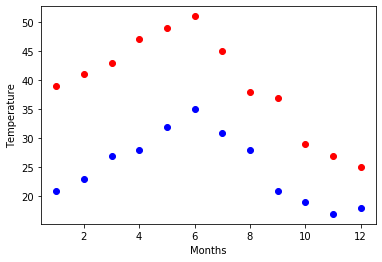

In [62]:
months = np.arange(1,13)
y1 = temp_max
y2 = temp_min

# fig = plt.figure()
# ax = fig.subplots(2,1)
# ax = plt.axes()
plt.plot(months,y1,'ro')
plt.plot(months,y2,'bo')
plt.xlabel('Months')
plt.ylabel('Temperature')

In [63]:

from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

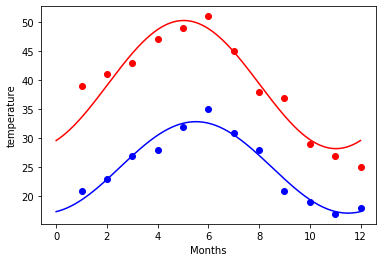

In [74]:
days = np.linspace(0,12,365)
plt.figure()
plt.plot(months,temp_max,'ro')
plt.plot(days,yearly_temps(days,*res_max),'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days,yearly_temps(days,*res_min),'b-')
plt.xlabel("Months")
plt.ylabel("temperature")
plt.show()

In [76]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

In [77]:
titanic = pd.read_csv(url)

In [183]:
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


C:\Users\mahes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


([<matplotlib.patches.Wedge at 0x25e7ad01390>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'male'),
  Text(0.48083667958064136, -0.9893412391939719, 'female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.4%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.6%')])

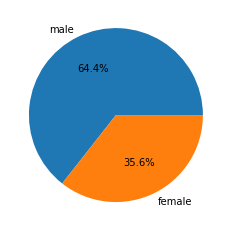

In [182]:
plt.figure()
plt.pie([titanic['sex'].value_counts()],labels=['male','female'],autopct="%1.1f%%")

In [91]:
[titanic['sex'].value_counts()]

[male      843
 female    466
 Name: sex, dtype: int64]

In [162]:
scatter_titanic = titanic[['age','fare','sex']].dropna()
scatter_titanic['age'] = scatter_titanic['age'].astype(int)
scatter_titanic.head()

,age,fare,sex
0,29,211.3375,female
1,0,151.5500,male
2,2,151.5500,female
3,30,151.5500,male
4,25,151.5500,female


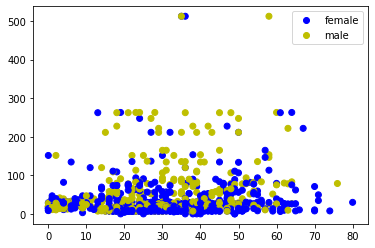

In [283]:

from matplotlib.colors import ListedColormap

classes = [i for i in scatter_titanic['sex'].unique()]
values = [val for val in (scatter_titanic['sex'].apply(lambda x : 0 if x == 'male' else 1))]
colours = ListedColormap(['b','y'])


scatter = plt.scatter(x='age',y='fare',data=scatter_titanic ,c=values, cmap=colours)

plt.legend(handles=scatter.legend_elements()[0], labels=classes)